#  Random forest algorithm

In this iPython notebook we would define Random forest classifier using Decision tree classifier and see, how some hyperparameters and variation of approaches will influence on the result of algorithms work. 

In [115]:
from sklearn import datasets, model_selection, ensemble, tree
import numpy as np
import pandas as pd

In [116]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


Firstly I loaded a toy dataset from sklearn.datasets in code below.

In [117]:
digits = datasets.load_digits()
X = digits.data
y = digits.target

Plots below show us how target feauture depends from another feautures in dataset. So, we can match non-informative feautures beforehand just by the appearance of their depedence plot. The number of feautures in this dataset is 64.

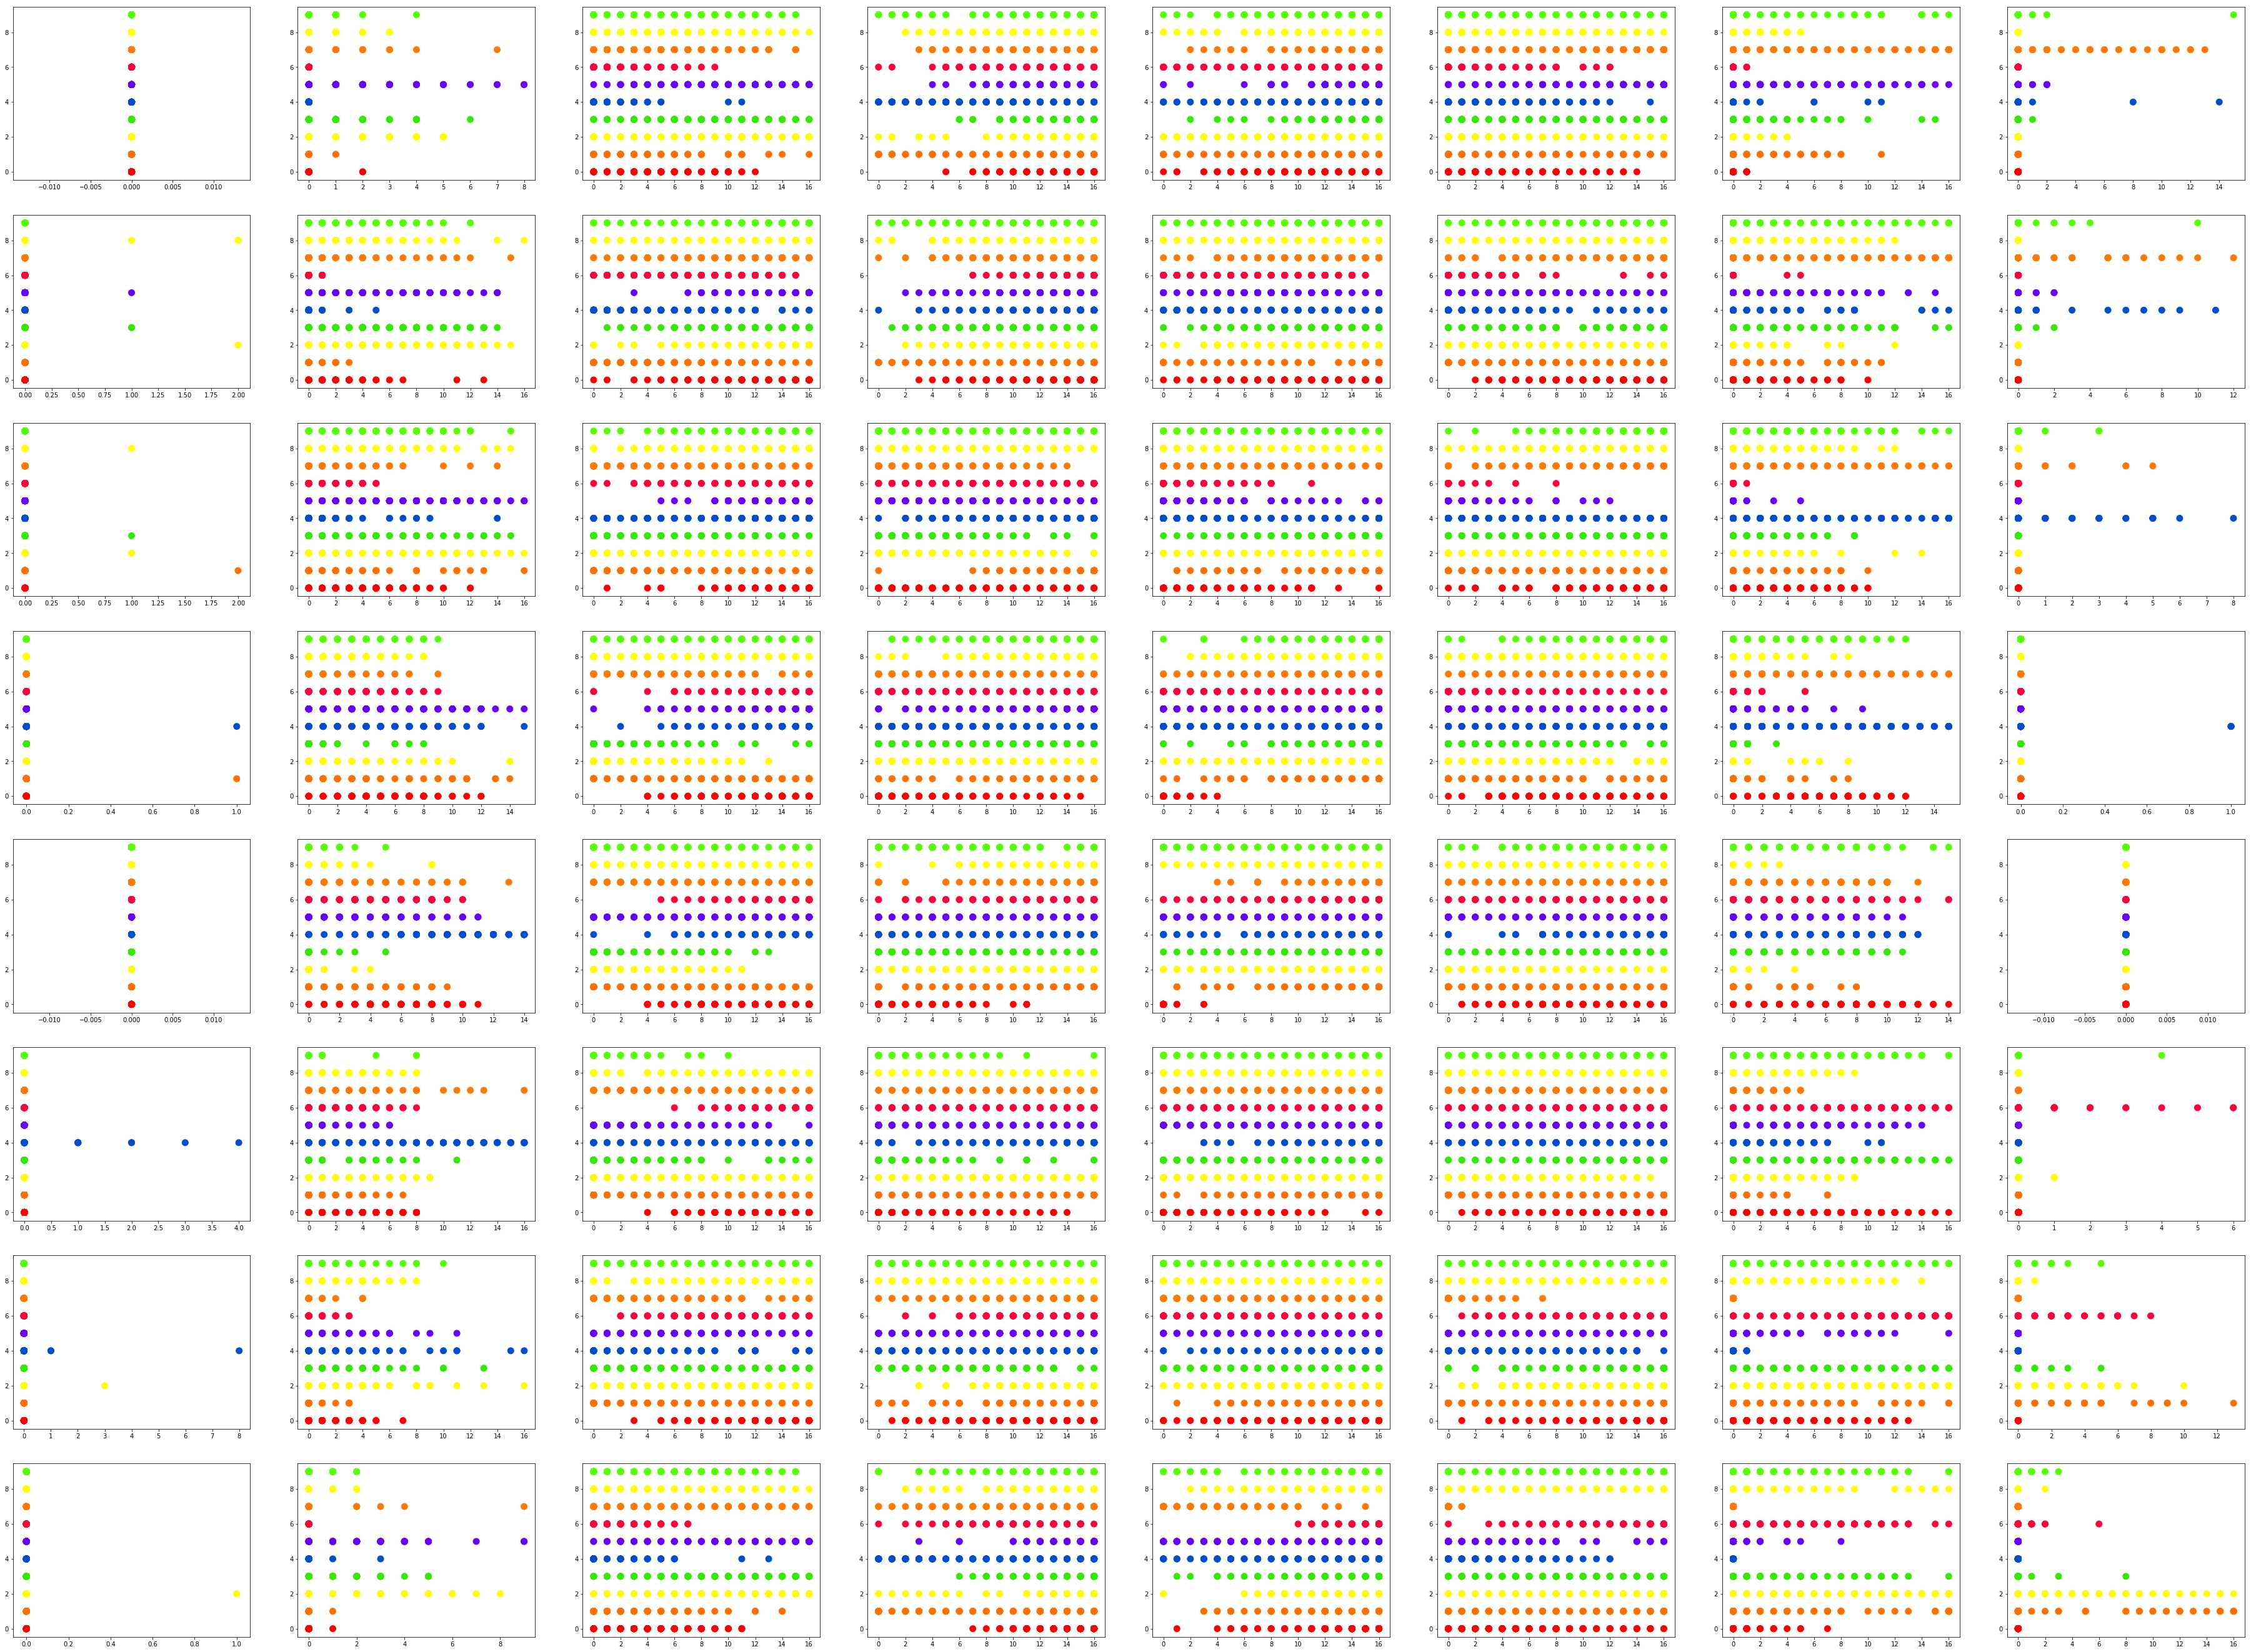

In [118]:
pyplot.figure(figsize = (64, 48))
for i in xrange(0, 64):
    pyplot.subplot(8,8,i + 1)
    pylab.scatter(X[:,i], y, c = y, cmap = 'prism', s=100)

It's convinient to define such function, which trains brought classificator on our dataset, returns test scores array and mean test score, and draws train / test score from train size dependence plot.

In [119]:
def learning_curve_plot(classificator):
    train_sizes, train_scores, test_scores = model_selection.learning_curve(classificator, X, y, 
                                                                           train_sizes = np.arange(0.1,1, 0.2), 
                                                                           cv = 10, scoring = 'accuracy')

    pylab.grid(True)
    pylab.plot(train_sizes, train_scores.mean(axis = 1), 'g-', marker = 'o', label = 'train')
    pylab.plot(train_sizes, test_scores.mean(axis = 1), 'r-', marker = 'o', label = 'test')
    pylab.ylim((0.0, 1.05))
    pylab.legend(loc = 'lower right')
    
    print test_scores.mean()
    print test_scores

To begin with let consider a single Desicion tree classifier. Further we would see that in every experiment train curve is constant with ideal score. Very likely it's because of our toy dataset specific and since we haven't any limits in our trees depth. Exactly as we haven't any limits, we have such low scores on our single tree test. Our classificator is overfitted.

In [120]:
clf = tree.DecisionTreeClassifier()

0.7183402207853352
[[0.67567568 0.61202186 0.50828729 0.42222222 0.52513966 0.51396648
  0.65921788 0.6011236  0.48022599 0.57386364]
 [0.66486486 0.78688525 0.75138122 0.56111111 0.68156425 0.70949721
  0.73743017 0.6741573  0.62146893 0.63068182]
 [0.72432432 0.79234973 0.75138122 0.73888889 0.7150838  0.75418994
  0.7877095  0.73595506 0.65536723 0.67613636]
 [0.68648649 0.83060109 0.80110497 0.76111111 0.81564246 0.8603352
  0.83240223 0.85393258 0.76836158 0.73295455]
 [0.83783784 0.79781421 0.83977901 0.83888889 0.81005587 0.8547486
  0.82681564 0.87078652 0.76836158 0.80681818]]


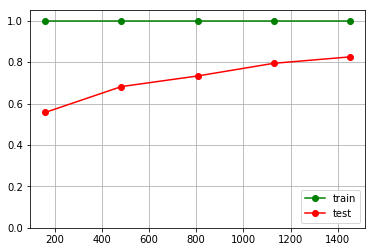

In [121]:
learning_curve_plot(clf)

Now we are going to fit Bagging to our Decision tree classifier. An amount of trees in bagging would be an 100. We can see, that test scores are much better than with a single tree.

In [122]:
bgg_clf = ensemble.BaggingClassifier(clf, n_estimators = 100)

0.8591396744182963
[[0.82702703 0.83060109 0.66298343 0.55555556 0.72067039 0.72067039
  0.81564246 0.74157303 0.74011299 0.72727273]
 [0.85945946 0.89617486 0.86740331 0.72222222 0.80446927 0.8547486
  0.9273743  0.87078652 0.88135593 0.8125    ]
 [0.86486486 0.91256831 0.87845304 0.93333333 0.88826816 0.91620112
  0.93296089 0.87640449 0.84180791 0.89772727]
 [0.84324324 0.94535519 0.88950276 0.93333333 0.87150838 0.93854749
  0.96089385 0.91011236 0.84745763 0.88068182]
 [0.83783784 0.93989071 0.92265193 0.93333333 0.91061453 0.97765363
  0.96648045 0.8988764  0.86440678 0.90340909]]


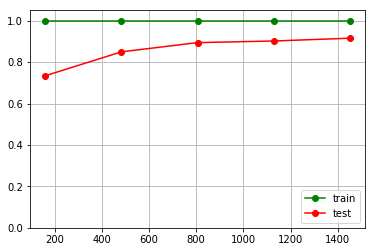

In [123]:
learning_curve_plot(bgg_clf)

If we train every tree in Bagging on random $\sqrt{n}$ features, not on all feautures in dataset, it will increase test scores, what we can see on our plot.

In [124]:
root_bgg_clf = ensemble.BaggingClassifier(clf, n_estimators = 100, max_features = (np.sqrt(X.shape[1]) / X.shape[1]))

0.8833910273691983
[[0.87027027 0.87978142 0.72928177 0.62222222 0.72067039 0.76536313
  0.82122905 0.82022472 0.76271186 0.79545455]
 [0.86486486 0.95081967 0.87845304 0.77222222 0.8547486  0.8547486
  0.94413408 0.92696629 0.85875706 0.86363636]
 [0.86486486 0.93989071 0.91712707 0.90555556 0.92178771 0.9273743
  0.92178771 0.92134831 0.88135593 0.89772727]
 [0.8972973  0.95081967 0.92265193 0.91666667 0.91061453 0.91620112
  0.95530726 0.94382022 0.88135593 0.90340909]
 [0.89189189 0.95628415 0.9281768  0.90555556 0.93854749 0.95530726
  0.96648045 0.96629213 0.88135593 0.92613636]]


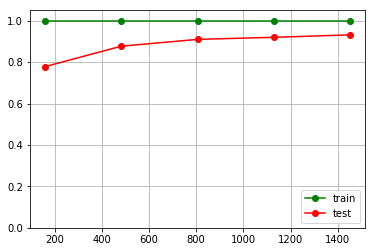

In [125]:
learning_curve_plot(root_bgg_clf)

And finally, if we would choose random $\sqrt{n}$ features for every vertex of every tree, not just for every tree, it will increase test scores even more. This result is caused by trees increased diversity.

In [126]:
rand_clf = tree.DecisionTreeClassifier(max_features = (np.sqrt(X.shape[1]) / X.shape[1]))

In [127]:
rand_bgg_clf = ensemble.BaggingClassifier(rand_clf, n_estimators = 100)

0.8959872171184786
[[0.87567568 0.8579235  0.70718232 0.60555556 0.74860335 0.7877095
  0.83240223 0.82022472 0.74011299 0.77272727]
 [0.87567568 0.91256831 0.90055249 0.8        0.88826816 0.88826816
  0.9273743  0.93820225 0.9039548  0.86363636]
 [0.89189189 0.96174863 0.93370166 0.92777778 0.94972067 0.94972067
  0.96089385 0.94382022 0.87570621 0.93181818]
 [0.89189189 0.96721311 0.91712707 0.96666667 0.91620112 0.96089385
  0.97765363 0.96067416 0.88700565 0.90909091]
 [0.91891892 0.96174863 0.9281768  0.96111111 0.94972067 0.97206704
  0.97765363 0.95505618 0.91525424 0.93181818]]


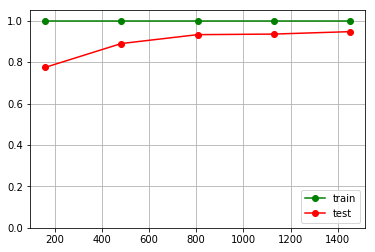

In [128]:
learning_curve_plot(rand_bgg_clf)

Now we train Random forest classifier from sklearn. It is essential to notice that results are almost similar to our previous experiment. It appears that we have represented Random forest algorithm above. 

As a conclusion I'd like to tell some thoughts rely on observations. The quality of Random forest grows as separate trees diversity grows. Diversity helps to minimize scattering on mean value of all trees. The depth of every separate tree should be as big as possible, so they become overfitted and it helps to minimize forest offset. Also as train size increases, scores increase too. But on very large train subsets quality improvements aren't visible.

In [129]:
rf_clf = ensemble.RandomForestClassifier(n_estimators = 100)

0.8960290057611315
[[0.8972973  0.86885246 0.6961326  0.60555556 0.74860335 0.76536313
  0.8603352  0.81460674 0.75706215 0.80113636]
 [0.88108108 0.91803279 0.89502762 0.80555556 0.8547486  0.92178771
  0.93854749 0.9494382  0.89265537 0.86931818]
 [0.85945946 0.95081967 0.91712707 0.95       0.91620112 0.94413408
  0.96648045 0.93820225 0.8700565  0.9375    ]
 [0.87567568 0.96174863 0.9281768  0.95       0.9273743  0.96648045
  0.96089385 0.94382022 0.90960452 0.90909091]
 [0.9027027  0.95628415 0.95027624 0.96111111 0.96089385 0.97206704
  0.97206704 0.96067416 0.91525424 0.92613636]]


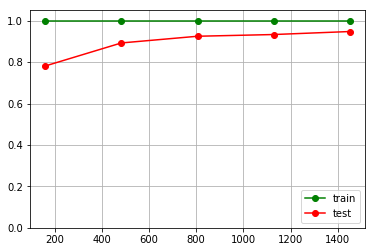

In [130]:
learning_curve_plot(rf_clf)